In [326]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#### Getting a dataset

the data we'll


MNIST -> Modified National Institute of Standard technology


In [327]:
# setup training data

train_data = torchvision.datasets.FashionMNIST(
    root='../data',
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = torchvision.datasets.FashionMNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

In [328]:
len(train_data), len(test_data)

(60000, 10000)

In [329]:
image, label = train_data[0]

In [330]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [331]:
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [332]:
class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [333]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [334]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

#### Visualize data


Text(0.5, 1.0, '9')

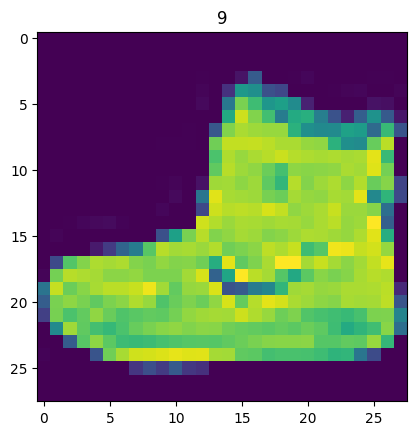

In [335]:
image, label = train_data[0]

plt.imshow(image.squeeze())
plt.title(label)

# image

Text(0.5, 1.0, 'Ankle boot')

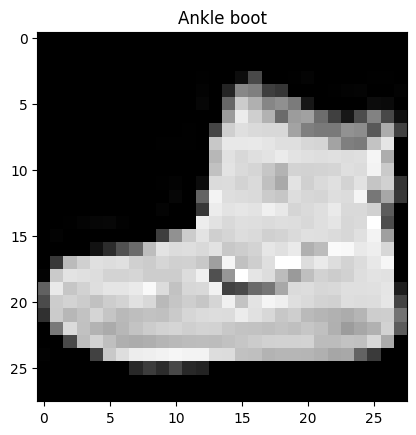

In [336]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

##### Plot more image


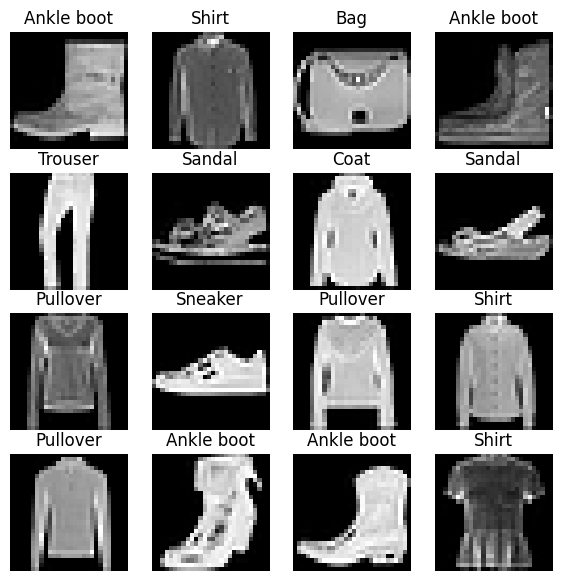

In [337]:
torch.manual_seed(42)
fig = plt.figure(figsize=(7, 7))
rows, cols = 4, 4 

for i in range(1, rows * cols +  1):
    rand_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

#### Prepare data loadaer


In [338]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ../data
     Split: Test
     StandardTransform
 Transform: ToTensor())

DataLoader:

It’s a wrapper around a Dataset that handles batching, shuffling, and parallel loading.

You give it a dataset, and it yields mini-batches.

Dataset:

It’s a class that represents your data.

You define how to load a single sample (image, label, etc.).

Usually, you subclass torch.utils.data.Dataset and implement:

`__len__(self)` # returns number of samples
`__getitem__(self, idx)` # returns one sample (data, label)


In [339]:
from torch.utils.data import Dataset, DataLoader

BATCH_SIZE = 32

train_data_loader =  DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data_loader =  DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [340]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x19437be3350>,
 <torch.utils.data.dataloader.DataLoader at 0x1943229fb30>)

In [341]:
print(f"Dataloaders: {train_data_loader, test_data_loader}") 
print(f"Length of train dataloader: {len(train_data_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_data_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000019437BE3350>, <torch.utils.data.dataloader.DataLoader object at 0x000001943229FB30>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [342]:
train_feature_batch, train_label_batch = next(iter(train_data_loader))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

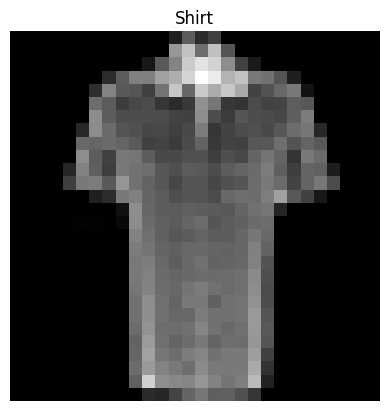

In [343]:
torch.manual_seed(42)

rand_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[rand_idx], train_label_batch[rand_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)


#### Build a basline model


In [344]:
flatten_model = nn.Flatten()


X = train_feature_batch[0]


output = flatten_model(X)

X.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [345]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [346]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [347]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [348]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [349]:
dummy_x = torch.rand([1, 28, 28])

In [350]:
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [351]:

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [352]:
from helper_functions import accuracy_fn

In [353]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [354]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device: torch.device = None):
    "prints diff b/w start and end time"

    total_time =end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
end_time = timer()

print_train_time(start=start_time, end=end_time)

Train time on None: 0.000 seconds


4.079999962414149e-05

In [360]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    # --- TRAIN ---
    model_0.train()
    train_loss = 0

    for batch, (img, label) in enumerate(train_data_loader):
        # Forward pass
        y_pred = model_0(img)
        loss = loss_fn(y_pred, label)
        train_loss += loss.item()

        # Backward + Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(img)} / {len(train_data_loader.dataset)} samples')

    train_loss /= len(train_data_loader)

    # --- TEST ---
    model_0.eval()
    test_loss = 0
    test_acc = 0

    with torch.inference_mode():
        for X_test, Y_test in test_data_loader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, Y_test).item()
            test_acc += accuracy_fn(
                y_true=Y_test,
                y_pred=test_pred.argmax(dim=1)
            )

    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)

    print(
        f"Epoch {epoch+1} | "
        f"Train Loss: {train_loss:.4f} | "
        f"Test Loss: {test_loss:.4f} | "
        f"Test Acc: {test_acc:.2f}%"
    )

train_time_end_on_cpu = timer()
print(f"Training time: {train_time_end_on_cpu - train_time_start_on_cpu:.2f} seconds")


  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|███▎      | 1/3 [00:07<00:14,  7.30s/it]

Epoch 1 | Train Loss: 0.4363 | Test Loss: 0.4622 | Test Acc: 83.73%
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:21<00:11, 11.48s/it]

Epoch 2 | Train Loss: 0.4288 | Test Loss: 0.4967 | Test Acc: 82.91%
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|██████████| 3/3 [00:36<00:00, 12.28s/it]

Epoch 3 | Train Loss: 0.4252 | Test Loss: 0.5072 | Test Acc: 83.10%
Training time: 36.83 seconds


#### Make Predictions and get Model 0 results


In [361]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X, y
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_0_results = eval_model(model=model_0, data_loader=test_data_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.506486177444458,
 'model_acc': 83.12699680511182}